# **Covid-19 Vaccines Analysis**

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Import Libraries</li>
        <li>Download and EDA</li>
        <li>Data Wrangling and Preprocessing</li>
        <li>Analysis around the World</li>
        <li>Analysis in Europe</li>
    </ul>
</div>

<hr>

## Import Libraries

In [317]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

## Download and EDA

We will use a covid-19 vaccinations dataset.
The dataset that has been used is taken from Kaggle and have the following information :

|Column | Description|
|-|-|
|location| Country|
|iso_code| Iso code of the country|
|date| Date of |
|total_vaccinations| Number of total vaccinations|
|people_vaccinated| People with at least one vaccination|
|people_fully_vaccinated| People fully vaccinated|
|daily_vaccinations_raw| Daily vaccinations|
|daily_vaccinations| Daily vaccinations|
|total_vaccinations_per_hundred| Total number vaccination per hundred|
|people_vaccinated_per_hundred| People vaccinated per hundred|
|people_fully_vaccinated_per_hundred| People fully vaccinated per hundred|
|daily_vaccinations_per_million| Daily vaccinations per million|
|vaccines| Name of the vaccine|
|source_name| Source name of the row data|
|source_website| Source website of the row data|                     

In [318]:
path = "/content/drive/MyDrive/Colab Notebooks/Covid-19 Vaccines Analysis/country_vaccinations.csv"
vaccinations_df = pd.read_csv(path)
vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [319]:
vaccinations_df.shape

(31240, 15)

In [320]:
vaccinations_df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [321]:
vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


## Data Wrangling

Let's go check if there are any null values in our dataset.

In [322]:
vaccinations_df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

We are going to drop all the null values from the dataset

In [323]:
"""
total_vaccinations_mean = vaccinations_df['total_vaccinations'].mean()
people_vaccinated_mean = vaccinations_df['people_vaccinated'].mean()
people_fully_vaccinated_mean = vaccinations_df['people_fully_vaccinated'].mean()
daily_vaccinations_raw_mean = vaccinations_df['daily_vaccinations_raw'].mean()
daily_vaccinations_mean = vaccinations_df['daily_vaccinations'].mean()
total_vaccinations_per_hundred_mean = vaccinations_df['total_vaccinations_per_hundred'].mean()
people_vaccinated_per_hundred_mean = vaccinations_df['people_vaccinated_per_hundred'].mean()
people_fully_vaccinated_per_hundred_mean = vaccinations_df['people_fully_vaccinated_per_hundred'].mean()
daily_vaccinations_per_million_mean = vaccinations_df['daily_vaccinations_per_million'].mean()

vaccinations_df['total_vaccinations'] = vaccinations_df['total_vaccinations'].fillna(total_vaccinations_mean)
vaccinations_df['people_vaccinated'] = vaccinations_df['people_vaccinated'].fillna(people_vaccinated_mean)
vaccinations_df['people_fully_vaccinated'] = vaccinations_df['people_fully_vaccinated'].fillna(people_fully_vaccinated_mean)
vaccinations_df['daily_vaccinations_raw'] = vaccinations_df['daily_vaccinations_raw'].fillna(daily_vaccinations_raw_mean)
vaccinations_df['daily_vaccinations'] = vaccinations_df['daily_vaccinations'].fillna(daily_vaccinations_mean)
vaccinations_df['total_vaccinations_per_hundred'] = vaccinations_df['total_vaccinations_per_hundred'].fillna(total_vaccinations_per_hundred_mean)
vaccinations_df['people_vaccinated_per_hundred'] = vaccinations_df['people_vaccinated_per_hundred'].fillna(people_vaccinated_per_hundred_mean)
vaccinations_df['people_fully_vaccinated_per_hundred'] = vaccinations_df['people_fully_vaccinated_per_hundred'].fillna(people_fully_vaccinated_per_hundred_mean)
vaccinations_df['daily_vaccinations_per_million'] = vaccinations_df['daily_vaccinations_per_million'].fillna(daily_vaccinations_per_million_mean)
"""
vaccinations_df.dropna(inplace = True)

And break down the date into the days, months and years adding this 3 columns  `[Day_num, Day, Month, Year]` into the dataset

In [324]:
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date'], format = '%Y-%m-%d')

le = LabelEncoder()
vaccinations_df['Day_num'] = le.fit_transform(vaccinations_df.date)
vaccinations_df['Day'] = vaccinations_df['date'].dt.day
vaccinations_df['Month'] = vaccinations_df['date'].dt.month
vaccinations_df['Year'] = vaccinations_df['date'].dt.year
vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day_num,Day,Month,Year
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,167,27,5,2021
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,174,3,6,2021
182,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,69,18,2,2021
264,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,151,11,5,2021
265,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,152,12,5,2021


For a better understanding of the column dataset, we have renamed the `location`
label in `country`




In [325]:
vaccinations_df.rename(columns = {'location':'country'}, inplace=True)
pd.to_datetime(vaccinations_df.date)
vaccinations_df.country.value_counts()

Scotland        215
Austria         200
Germany         200
Belgium         199
England         195
               ... 
South Sudan       1
Rwanda            1
Senegal           1
Sierra Leone      1
Liberia           1
Name: country, Length: 145, dtype: int64

The United Kingdom is made up of England, Scotland, Wales, and Northern Ireland. But in the above data, these countries are mentioned separately with the same values as in the United Kingdom. So this may be an error while recording this data. So we have dropped those countries that have duplicate values

In [326]:
vaccinations_df = vaccinations_df[vaccinations_df.country.apply(lambda x: x not in ["England", "Scotland", "Wales", "Northern Ireland"])]
vaccinations_df.country.value_counts()

Germany         200
Austria         200
Belgium         199
Israel          193
Italy           193
               ... 
Botswana          1
Andorra           1
South Sudan       1
Rwanda            1
Sierra Leone      1
Name: country, Length: 141, dtype: int64

## Analysis around the World

We have explored the number of vaccines taken by each country. Now we are going to explore the vaccines in the dataset

In [327]:
vaccinations_df.vaccines.value_counts()

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  3044
Moderna, Pfizer/BioNTech                                                                        997
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                    841
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                               630
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                    542
Oxford/AstraZeneca, Pfizer/BioNTech                                                             474
Johnson&Johnson, Moderna, Pfizer/BioNTech                                                       316
Oxford/AstraZeneca, Sinopharm/Beijing                                                           313
Pfizer/BioNTech, Sinovac                                                                        287
Pfizer/BioNTech                                                                                 285


Now let's find out which vaccines have been used in which country.

In [328]:
data = vaccinations_df[['vaccines','country']]
data.head()

,vaccines,country
94,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
101,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
182,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Albania
264,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Albania
265,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Albania


Let’s see how many countries are taking each of the vaccines mentioned in this data

In [329]:
dict_ = {}
for i in vaccinations_df.vaccines.unique():
  dict_[i] = [vaccinations_df["country"][j] for j in vaccinations_df[vaccinations_df["vaccines"]==i].index]

vaccines = {}
for key, value in dict_.items():
  vaccines[key] = set(value)

df = pd.DataFrame(list(vaccines.items()), columns=["vaccines", "countries"])
df

,vaccines,countries
0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",{Afghanistan}
1,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...","{Albania, Tunisia, Oman}"
2,"Oxford/AstraZeneca, Pfizer/BioNTech","{Cape Verde, Australia, Saudi Arabia, Andorra,..."
3,Oxford/AstraZeneca,"{Barbados, French Polynesia, Nigeria, Trinidad..."
4,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V","{Sri Lanka, Argentina}"
5,Pfizer/BioNTech,"{New Zealand, Gibraltar, Aruba}"
6,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...","{Germany, Czechia, Latvia, South Korea, Malta,..."
7,"Oxford/AstraZeneca, Sinovac, Sputnik V",{Azerbaijan}
8,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...","{Moldova, Mongolia, Lebanon, Serbia, Montenegr..."
9,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...","{Maldives, Bangladesh, Peru}"


In [330]:
countries = vaccinations_df.country.unique()
vaccines_comb = vaccinations_df.vaccines.unique()
total_vacc = vaccinations_df.groupby(['country'])['total_vaccinations'].sum()

Finally, we plot a visual map that shows what combination of vaccines has been used by each country

In [331]:
vaccine_map = px.choropleth(vaccinations_df, locations = 'iso_code', color = 'vaccines')
vaccine_map.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map.show()

As we can see from the plot, the country having the highest number of vaccinations is China

In [332]:
fig = px.bar(x=countries, y=total_vacc, width=3000, height=400)
fig.update_layout(title='Vaccinations around the World')
fig.update_xaxes(title_text='Countries', dtick=1.4)
fig.update_yaxes(title_text='Total Vaccinations')
fig.show()

Let's see the first 10 countries with maximum number of covid vaccinations done around the world. Italy is the 9th country for number of vaccinations done, let's explore the dataset in the Europe region

In [333]:
zipped = list(zip(countries, total_vacc))
df_vacc_total = pd.DataFrame(zipped, columns=['Country', 'Vaccinations'])
sorted_df = df_vacc_total.sort_values(by = ['Vaccinations'], ascending = False)
sorted_df.head(10)

,Country,Vaccinations
136,United States,3.261102e+10
57,India,2.159900e+10
135,United Kingdom,7.839957e+09
45,Germany,5.473729e+09
16,Brazil,5.105921e+09
41,France,4.047035e+09
131,Turkey,3.839556e+09
63,Italy,3.812961e+09
104,Russia,2.981897e+09
81,Mexico,2.752084e+09


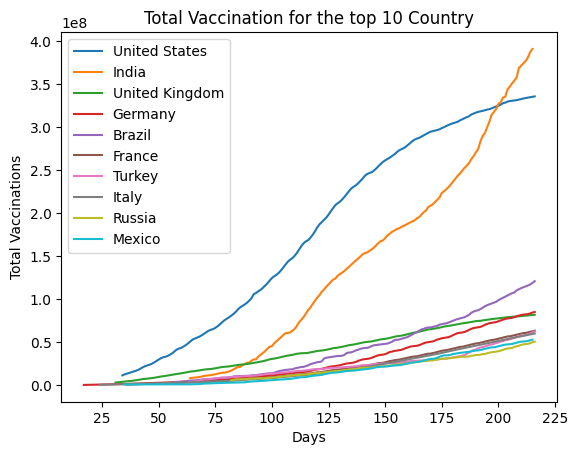

In [334]:
for country in sorted_df['Country'][:10]:
  c = vaccinations_df[vaccinations_df['country'] == country]
  plt.plot(c['Day_num'], c['total_vaccinations'], label=country)

plt.title('Total Vaccination for the top 10 Country')
plt.xlabel('Days')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

## Analysis around Europe

Thanks to this GET call, we are able to obtain the names of the countries present in a specific region. In our case, we are interested in Europe.

In [335]:
def get_european_countries(region):
    response = requests.get("https://restcountries.com/v3.1/all")

    if response.status_code == 200:
        countries_data = response.json()
        european_countries = [country['name']['common'] for country in countries_data if region in country['region']]

        return european_countries
    else:
        print("Error request HTTP:", response.status_code)
        return []

In [336]:
european_countries_list = get_european_countries('Europe')
european_df = vaccinations_df[vaccinations_df['country'].isin(european_countries_list)]

In [337]:
euro_countries = european_df.country.unique()
euro_vaccines_comb = european_df.vaccines.unique()
euro_total_vacc = european_df.groupby(['country'])['total_vaccinations'].sum()

In [338]:
fig = px.bar(x=euro_countries, y=euro_total_vacc)
fig.update_layout(title='Vaccinations in Europe')
fig.update_xaxes(title_text='Countries', dtick=1.3, tickangle=-45)
fig.update_yaxes(title_text='Total Vaccinations')
fig.show()

array([[<Axes: title={'center': 'daily_vaccinations'}>]], dtype=object)

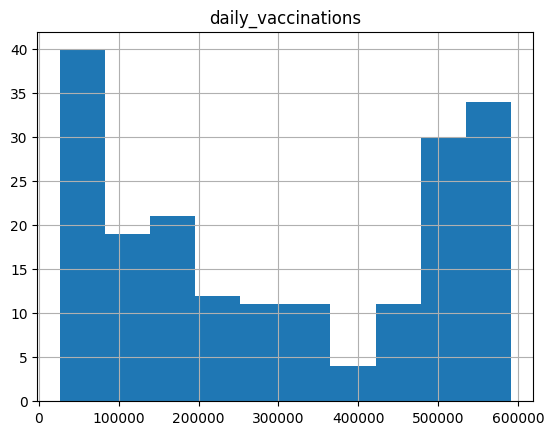

In [339]:
italy = vaccinations_df[vaccinations_df['country'] == 'Italy']
italy.hist(column = 'daily_vaccinations')

As we done previously, we are going to list the 10 countries with maximum number of vaccines done. And this time, Italy is placed 4th

In [340]:
zipped = list(zip(euro_countries, euro_total_vacc))
df_euro_vacc_total = pd.DataFrame(zipped, columns=['Country', 'Vaccinations'])
euro_sorted_df = df_euro_vacc_total.sort_values(by = ['Vaccinations'], ascending = False)
euro_sorted_df.head(10)

,Country,Vaccinations
41,United Kingdom,7.839957e+09
12,Germany,5.473729e+09
11,France,4.047035e+09
19,Italy,3.812961e+09
32,Russia,2.981897e+09
37,Spain,1.783103e+09
29,Poland,1.658534e+09
31,Romania,7.870246e+08
3,Belgium,7.715542e+08
7,Czechia,5.957812e+08


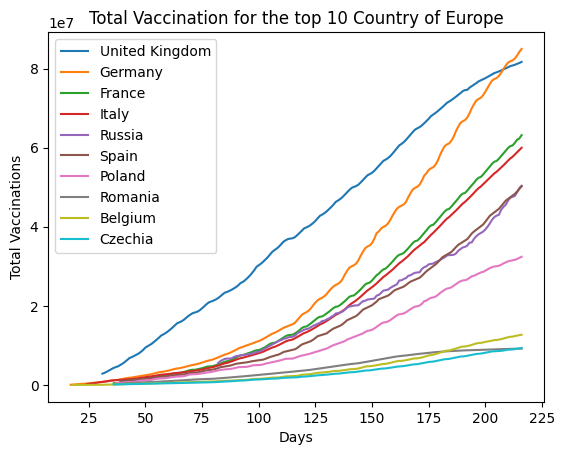

In [341]:
for country in euro_sorted_df['Country'][:10]:
  c = european_df[european_df['country'] == country]
  plt.plot(c['Day_num'], c['total_vaccinations'], label=country)

plt.title('Total Vaccination for the top 10 Country of Europe')
plt.xlabel('Days')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

## Linear Regression - Italy

<Axes: xlabel='Day_num', ylabel='people_vaccinated_per_hundred'>

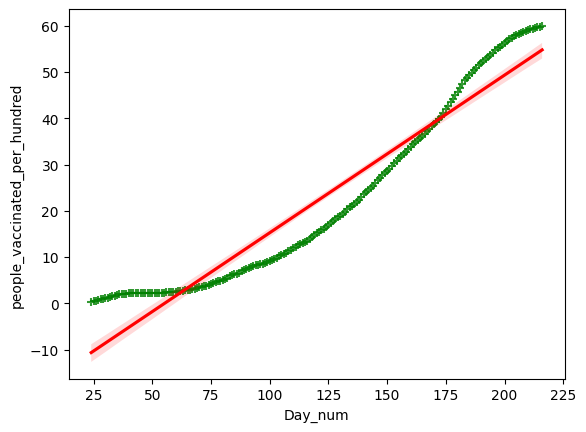

In [342]:
italy_df = vaccinations_df[vaccinations_df['country'] == 'Italy']
sns.regplot(x="Day_num", y="people_vaccinated_per_hundred", data=italy_df ,
            marker="+", scatter_kws={"color": "g"}, line_kws={"color": "red"})

In [343]:
italy_day_people_df = italy_df[["Day_num", "total_vaccinations_per_hundred"]]
italy_day_people_df.dropna(inplace=True)
x = italy_day_people_df[['Day_num']]
y = italy_day_people_df[['total_vaccinations_per_hundred']]

<ipython-input-343-86bcbbdc1045>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [344]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135, 1) (135, 1)
Test set: (58, 1) (58, 1)


In [345]:
LR = LinearRegression().fit(X_train, y_train)
LR

LinearRegression()

In [346]:
LR.coef_

array([[0.50877052]])

In [347]:
LR.intercept_

array([-28.96495914])

In [348]:
prediction = LR.predict(X_test)

<Axes: ylabel='Count'>

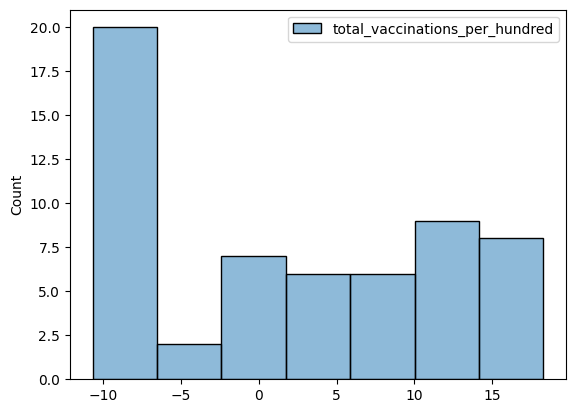

In [349]:
sns.histplot(y_test - prediction)

As we can see from the metrics calculated, the model performs well and has good ability to fit the data

In [350]:
print("R-Squared : ", metrics.r2_score(y_test, prediction))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, prediction))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R-Squared :  0.9051777384768086
Mean Absolute Error :  9.053641616001805
Mean Squared Error :  103.03520016658794
Root Mean Squared Error : 10.150625604689987
